# Nothing But NumPy: A 2-layer neural network
Part of the blog ["Nothing but NumPy: Understanding &amp; Creating neural networks with computational graphs from scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)- by [Rafay Khan](https://twitter.com/RafayAK)


In this notebook we'll create a 2-layer nueral network (i.e. a single hidden and output layer) and train it on the XOR data.


First, let's import NumPy, our layers and helper functions.

_Feel free to look into the helper functions in the `utils` directory_   

In [1]:
import numpy as np
from util.utilities import *
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
# to show all the generated plots inline in the notebook
%matplotlib inline 

#### The XOR data:

![XOR_data_and_plot](architecture_imgs/XOR_data_n_plot.png)

In [2]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

Let's set up training data. Recall, data needs to be in $(features \times \text{number_of_examples})$ shape. So, we need to transpose `X` and `Y`.

In [3]:
X_train = X.T
Y_train = Y.T

Recall, our neural net architecture with a single hidden layer with 3 neurons from the blog. We'll recreate it here.


![A 2-layer Neural Network](architecture_imgs/2_layer_NN.png)

In [4]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable
                  # (weights will now be initailzaed to the same pseudo-random numbers, each time)


# Our network architecture has the shape: 
#                   (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=3, ini_type='xavier')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define output layer that take is values from hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out=1, ini_type='xavier')
A2= SigmoidLayer(Z2.Z.shape)

# see what random weights and bias were selected and their shape 
# print(Z2.params)
# print(Z2.params)

Now we can start the training loop.

In [5]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA2 = compute_cost(Y=Y_train, Y_hat=A2.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    A2.backward(dA2)
    Z2.backward(A2.dZ)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

# See what the final weights and bias are training    
# print(Z2.params)
# print(Z2.params)

Cost at epoch#0: 0.12926510193084198
Cost at epoch#100: 0.12345825692804888
Cost at epoch#200: 0.12066966113381938
Cost at epoch#300: 0.1166803602125806
Cost at epoch#400: 0.11130833351272906
Cost at epoch#500: 0.10488049601356228
Cost at epoch#600: 0.09838889588798089
Cost at epoch#700: 0.09243739122926581
Cost at epoch#800: 0.08674109898244502
Cost at epoch#900: 0.0803633800361436
Cost at epoch#1000: 0.07188849409230211
Cost at epoch#1100: 0.060266822876482364
Cost at epoch#1200: 0.0466727790621477
Cost at epoch#1300: 0.03403180316972872
Cost at epoch#1400: 0.024420892209798033
Cost at epoch#1500: 0.017883350379483128
Cost at epoch#1600: 0.013556791347344188
Cost at epoch#1700: 0.010645079603116682
Cost at epoch#1800: 0.008621081313392127
Cost at epoch#1900: 0.007164447639006829
Cost at epoch#2000: 0.006081828121979105
Cost at epoch#2100: 0.005254042338109358
Cost at epoch#2200: 0.00460539786880718
Cost at epoch#2300: 0.0040862927529649404
Cost at epoch#2400: 0.0036632376282681616
Co

`predict` helper functionin the cell below returns three things:
- `p`: predicted labels (output 1 if predictded output is greater than 0.5) 
- `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just Y_hat) 
- `accuracy`: the number of correct predictions from total predictions

In the cell below we are not storing `probas`( pythonic way is to use `_` it its place)  

In [6]:
# see the ouptput predictions
predicted_outputs, _, accuracy = predict(X=X_train, Y=Y_train, Zs=[Z1, Z2], As=[A1, A2])

print("The predicted outputs:\n {}".format(predicted_outputs))
print("The accuracy of the model is: {}%".format(accuracy))

The predicted outputs:
 [[ 0.  1.  1.  0.]]
The accuracy of the model is: 100.0%


#### The learning curve

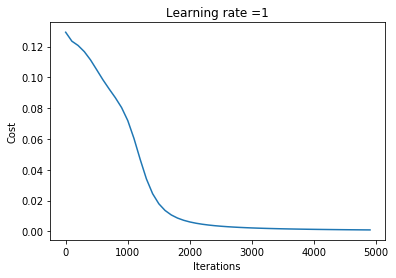

In [7]:
plot_learning_curve(costs=costs, learning_rate=learning_rate, total_epochs=number_of_epochs)

#### The decision boundary

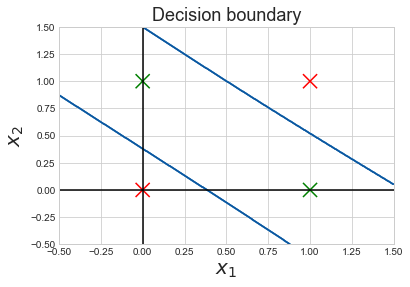

In [8]:
plot_decision_boundary(lambda x:predict_dec(Zs=[Z1, Z2], As=[A1, A2], X=x.T), X_train.T, Y_train.T)

#### The shaded decision boundary

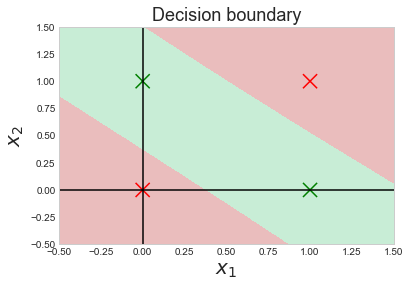

In [9]:
plot_decision_boundary_shaded(lambda x:predict_dec(Zs=[Z1, Z2], As=[A1, A2], X=x.T), X_train.T, Y_train.T)

## Bonus 

Try to reinitialize the weights to `ini_type=plain` and see what happens.